<a href="https://colab.research.google.com/github/EAFIT-BI/Supervised-Learning-2025-I/blob/main/Modelos_de_regresi%C3%B3n_regularizados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularización

In [26]:
# -------Pruebas Toyset-----------

#importamos librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

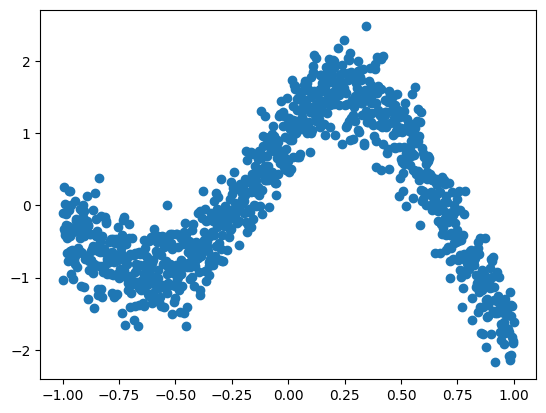

In [27]:
# Generamos el mismo toyset con el que probamos
# la regresión lineal

X = np.linspace(-1, 1, 1000)
ruido = np.random.normal(0, 0.333, 1000)

y = np.sin(4*X) + np.cos(3*X) + ruido

# Graficamos el toyset
plt.scatter(X, y)
plt.show()


In [28]:
# Agregamos las librerías especializadas

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Organizamos las dimensiones
X = X.reshape(-1, 1)

# Generamos el pipeline
pipe = Pipeline([('poly', PolynomialFeatures()),
                 ('model', LinearRegression(fit_intercept=True))])

# Posibles valores que pueden tomar los hiperparámetros
grados = range(2, 8)

# Inicializamos la lista de scores
scores = []

# Inicializamos la lista del promedio de los scores
mean_scores = []


In [29]:
# Sintonizamos los hiperparámetros

# Generamos un ciclo con los grados así:
for grado in grados:
  score = cross_val_score(estimator = pipe.set_params(poly__degree = grado),
                          X = X, y = y, cv = 5, scoring = 'neg_mean_squared_error')
  scores.append(score)
  mean_scores.append(-score.mean())


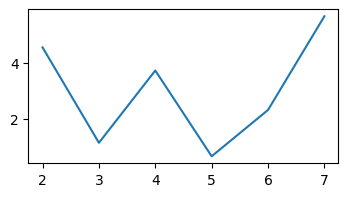

In [30]:
# Graficamos el rendimiento para decidir el valor
# del hiperparámetro
plt.figure(figsize = (4, 2))
plt.plot(grados, mean_scores)
plt.show()

Según el gráfico de los resultados de la validación cruzada, el valor del grado adecuado sería de 5.

# Regularización $L_2$ (Ridge)

En la regularización Ridge, se disminuyen algunos de los pesos de las características, por tanto es posible tener un modelo con menor sobre-entrenamiento (*overfitting*).

Para la regularización Ridge, se tiene la siguiente función de pérdidas:

$$J(\theta) = \sum_i^n (y_i - \theta X_i)^2 + \lambda \sum_i^p (\theta)^2$$

In [31]:
# Importamos las librerías adicionales

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Particionamos los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)



In [32]:
# generamos las características polinómicas
poly = PolynomialFeatures(degree = 5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# instanciamos el modelo
modelo = Ridge()

# creamos el diccionario del hiperparámetro lambda
alpha = np.logspace(-4, 2)
grid = dict(alpha = alpha)

from sklearn.model_selection import GridSearchCV

# instanciamos la búsqueda, en este caso haremos grid search
grid_search = GridSearchCV(estimator = modelo,
                            param_grid = grid,
                            scoring = 'neg_mean_squared_error',
                            cv = 5)

# generamos la búsqueda
grid_result = grid_search.fit(X_train_poly, y_train)

In [33]:
best_model = grid_result.best_estimator_
best_model.fit(X_train_poly, y_train)

Ridge(alpha=0.0022229964825261957)

In [34]:
# Validamos el modelo

y_train_pred = best_model.predict(X_train_poly)
y_test_pred = best_model.predict(X_test_poly)

print('MSE entrenamiento: ', mean_squared_error(y_train, y_train_pred))
print('MSE test: ', mean_squared_error(y_test, y_test_pred))
#

MSE entrenamiento:  0.11323911925592878
MSE test:  0.09669817197090094
